In [2]:
import numpy as np
import pandas as pd

df_cross_region = pd.read_csv("20200206-noweights.csv")
regions = df_cross_region["model"].unique()
regions_mapping = {name: i for i, name in enumerate(regions)}
df_cross_region.head()

,model,test,treesize,loss,auprc,auroc,acc
0,AGSO,AGSO,1000,0.013386,0.967790,0.998452,0.995237
1,AGSO,JAMSTEC,1000,0.009525,0.810217,0.965045,0.998211
2,AGSO,NGA,1000,0.832234,0.813449,0.834537,0.720822
3,AGSO,NGDC,1000,0.517390,0.191118,0.590328,0.922015
4,AGSO,NOAA_geodas,1000,1.564291,0.293224,0.406807,0.566867


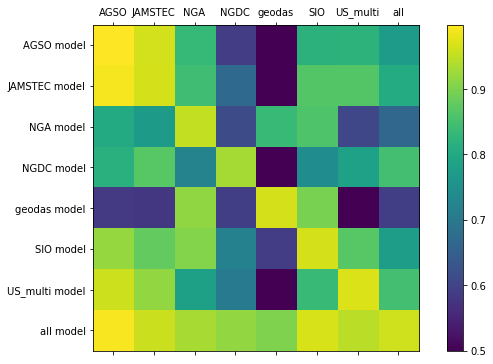

In [3]:
%matplotlib inline

from matplotlib import pyplot as plt

mat = np.zeros(shape=(len(regions_mapping), len(regions_mapping)))
for index, row in df_cross_region.iterrows():
    mat[regions_mapping[row.model]][regions_mapping[row.test]] = row.auroc

if True:
    THRESHOLD = 0.5
    mat = np.clip(mat, THRESHOLD, 1.0)

fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(mat)
fig.colorbar(cax);

regions_names = regions.tolist()
regions_names[regions_names.index("NOAA_geodas")] = "geodas"
ax.set_yticklabels([''] + [s + " model" for s in regions_names])
ax.set_xticklabels([''] + regions_names);

In [33]:
perf = {}
for index, row in df_cross_region.iterrows():
    if row.test not in perf:
        perf[row.test] = []
    perf[row.test].append((row.model, row.auroc))
for test in perf:
    perf[test] = sorted(perf[test])
    perf[test] = [vals[1] for vals in perf[test]]
perf["model trained on"] = regions_names
df_auroc = pd.DataFrame.from_dict(perf).set_index("model trained on")
df_auroc = df_auroc.append((df_auroc.loc["all"] - np.diag(df_auroc)))
index = df_auroc.index.tolist()
index[-1] = "all-diag"
df_auroc["model trained on"] = index
df_auroc = df_auroc.set_index("model trained on")

(df_auroc * 100).round(2)

,AGSO,JAMSTEC,NGA,NGDC,NOAA_geodas,SIO,US_multi,all
model trained on,,,,,,,,
AGSO,99.85,96.50,83.45,59.03,40.68,81.97,82.24,77.31
JAMSTEC,99.20,96.55,84.66,66.98,41.55,86.43,86.59,80.72
NGA,80.50,77.07,95.32,61.30,83.66,86.05,60.57,66.49
NGDC,81.57,86.83,72.38,93.14,37.19,74.30,78.49,85.01
geodas,58.48,58.05,91.60,59.21,96.71,89.84,45.70,59.23
SIO,91.95,87.90,90.58,71.98,59.01,96.54,86.89,77.67
US_multi,96.06,91.76,78.42,70.31,49.82,83.52,97.18,84.95
all,99.29,95.78,93.25,91.84,90.20,96.92,94.64,96.17
all-diag,-0.56,-0.77,-2.07,-1.30,-6.51,0.37,-2.54,0.00


TODO:

1. leave-one-out
2. cruise size distributioin